# <center> CS 666 Final Project - Regression Problem - Boston Housing Dataset </center> 

## Business Problem

I am a real estate agent and I have 3 clients selling their homes. I’m having trouble working
with them and I need your data science skills. They don’t trust Zillow or any online service for
setting prices. They’ve been burned by other real estate agents and the pricing formulas used.

These homes are in the Boston Area and a trusted advisor told me that you may be able to use
the boston housing dataset to help answer these questions:
1. What price would you recommend for each client?
2. Do these prices seem appropriate? How do you know?
3. What other factors should we be considering

Three Client's housing information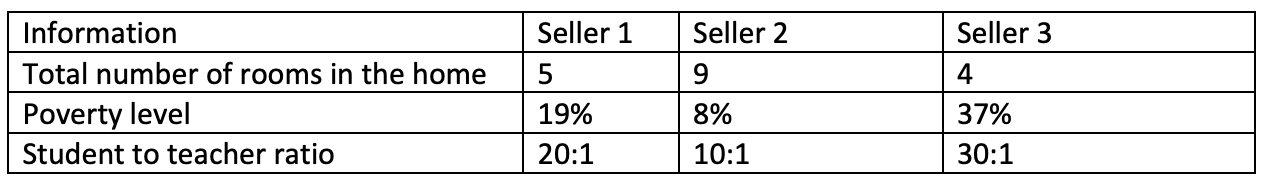

-----------------------------------------------------------------------------------------------------------

Boston Housing Dataset Description
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's


## Import Libraries

In [2]:
# Numerical Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Data Load
from sklearn.datasets import load_boston

# Data Preparation 
from sklearn.preprocessing import StandardScaler

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score, r2_score, accuracy_score


In [187]:
boston_dataset = load_boston()

In [188]:
boston_housing_dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [189]:
boston_housing_dataset['MEDV'] = boston_dataset.target

## Data Analysis
### Descriptive Statistics

In [190]:
boston_housing_dataset.head(20) #Check first few rows of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [191]:
boston_housing_dataset.shape # Shape of the dataset

(506, 14)

In [192]:
boston_housing_dataset.info() # General information about rows and columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [193]:
boston_housing_dataset.describe() # Statistical Description of the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [194]:
correlations = boston_housing_dataset.corr() # Correlations between the attributes

In [195]:
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


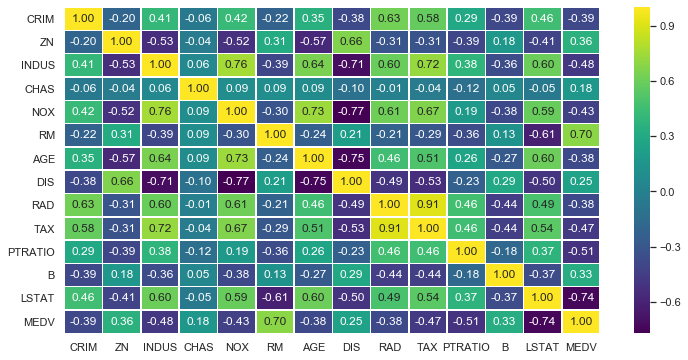

In [196]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(correlations, annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [197]:
boston_housing_dataset.skew() # To check the skewness of each attribute

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### Data Visualization

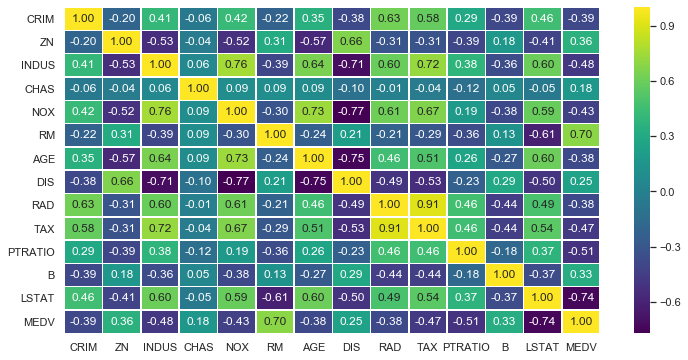

In [198]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(correlations, annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- MEDV -- RM (High Correlated - 0.70)
- RAD and TAX (Highly Correlated - 0.91)
- INDUS and TAX (Highly Correlated - 0.72)
- NOX and TAX (Highly Correlated - 0.67)

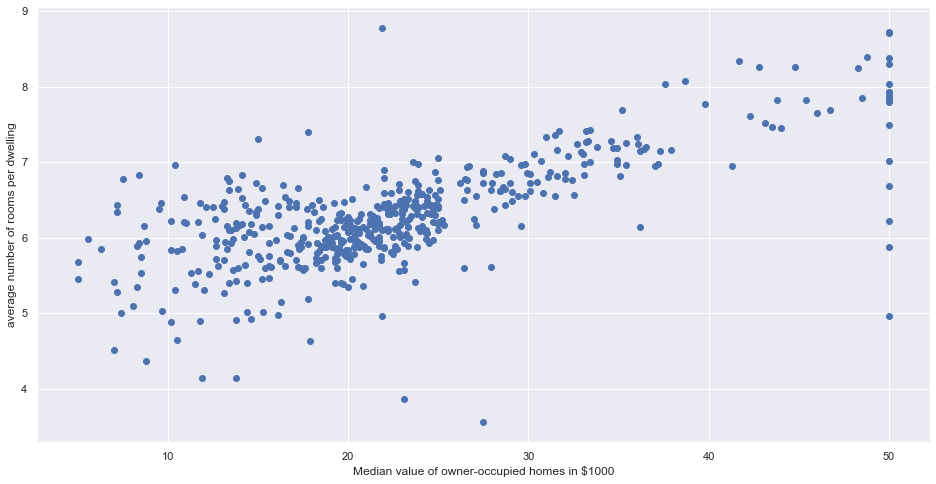

In [199]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_housing_dataset['MEDV'], boston_housing_dataset['RM'])
ax.set_xlabel('Median value of owner-occupied homes in $1000')
ax.set_ylabel('average number of rooms per dwelling')
plt.show()

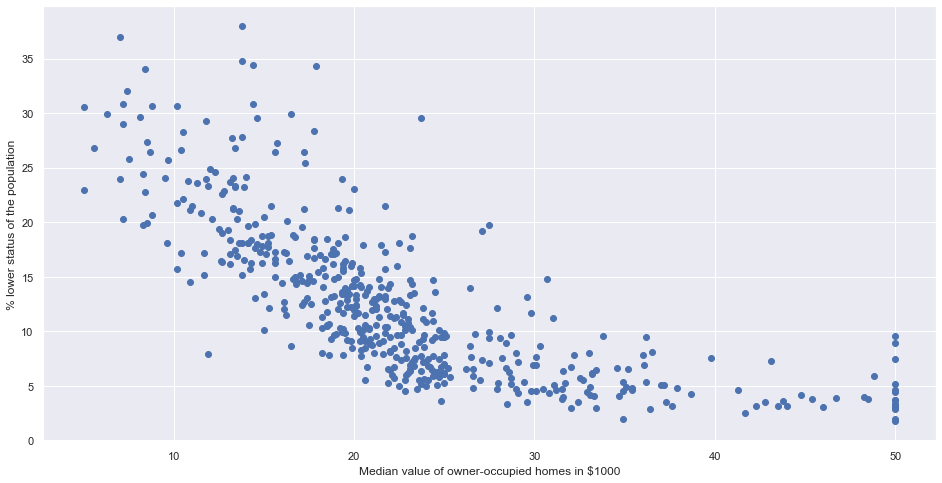

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_housing_dataset['MEDV'], boston_housing_dataset['LSTAT'])
ax.set_xlabel('Median value of owner-occupied homes in $1000')
ax.set_ylabel('% lower status of the population')
plt.show()

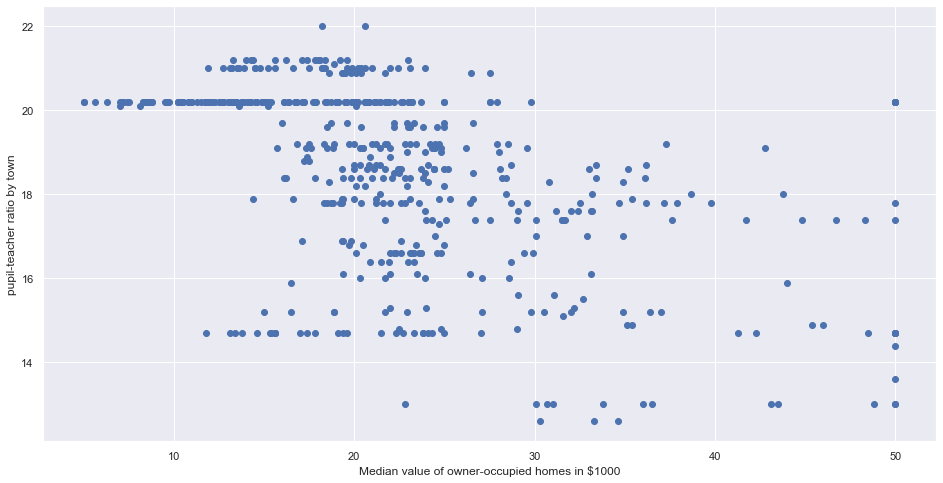

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_housing_dataset['MEDV'], boston_housing_dataset['PTRATIO'])
ax.set_xlabel('Median value of owner-occupied homes in $1000')
ax.set_ylabel('pupil-teacher ratio by town')
plt.show()

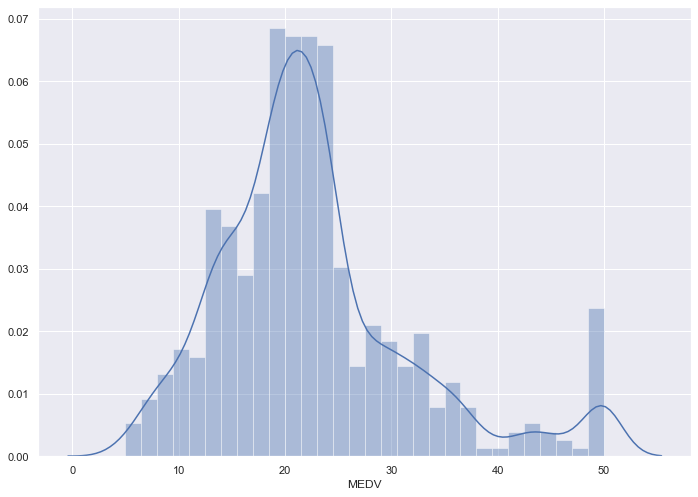

In [38]:
# Distribution of Target Variable 'MEDV'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing_dataset['MEDV'], bins=30)
plt.show()

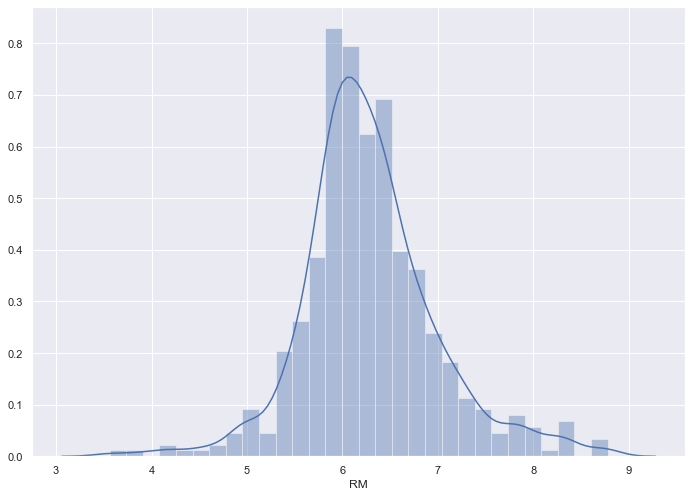

In [39]:
# Distribution of Target Variable 'RM'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing_dataset['RM'], bins=30)
plt.show()

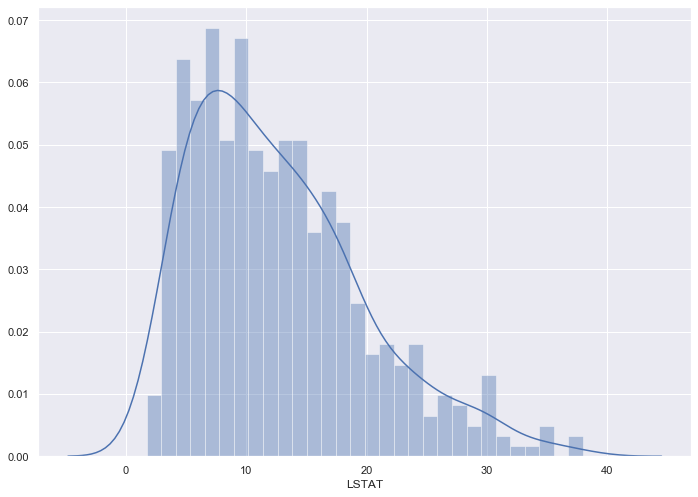

In [40]:
# Distribution of Target Variable 'LSTAT'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing_dataset['LSTAT'], bins=30)
plt.show()

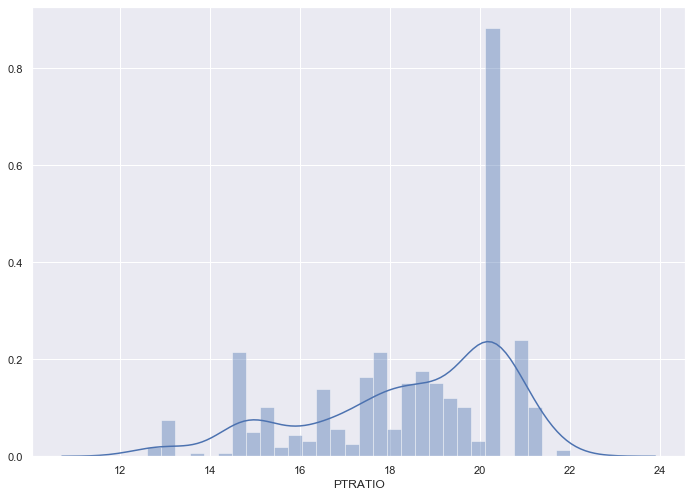

In [41]:
# Distribution of Target Variable 'PTRATIO'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_housing_dataset['PTRATIO'], bins=30)
plt.show()

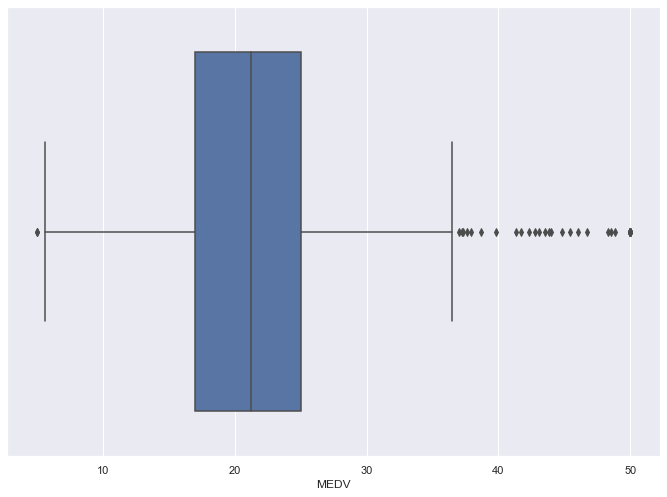

In [42]:
sns.boxplot(x=boston_housing_dataset['MEDV']) # Checking Outliers for MEDV (House Prices)

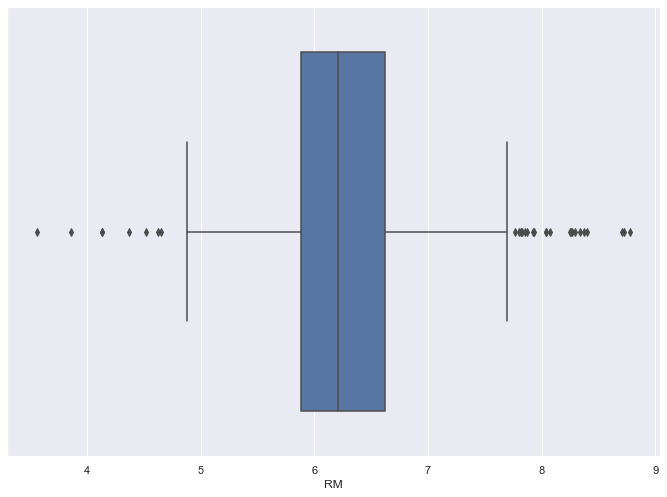

In [34]:
sns.boxplot(x=boston_housing_dataset['RM']) # Checking Outliers for RM (Number of Rooms)

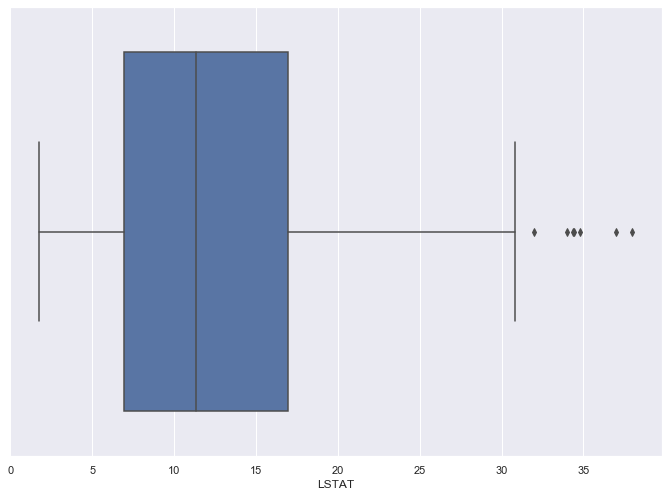

In [31]:
sns.boxplot(x=boston_housing_dataset['LSTAT']) # Checking Outliers for LSTAT (% lower status of the population)

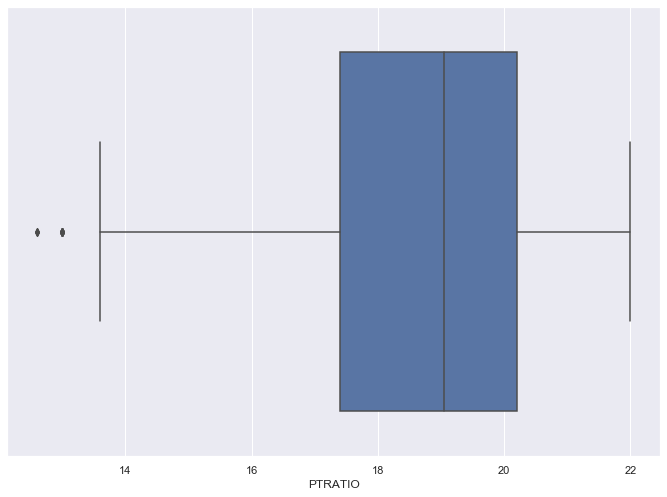

In [32]:
sns.boxplot(x=boston_housing_dataset['PTRATIO']) # Checking Outliers for PTRATIO (pupil-teacher ratio by town)

## Data Preparation

In [283]:
boston_housing_dataset_revised = boston_housing_dataset[['RM','LSTAT','PTRATIO','MEDV']] #We are selecting only RM, LSTAT, PTRATIO would be the predictors to predict target 'MEDV'.

In [52]:
boston_housing_dataset_revised.isnull().sum() # Checking Null values

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

### Remove Outliers using Z-score technique

In [53]:
from scipy import stats

z = np.abs(stats.zscore(boston_housing_dataset_revised))
print(z)

[[0.41367189 1.0755623  1.45900038 0.15968566]
 [0.19427445 0.49243937 0.30309415 0.10152429]
 [1.28271368 1.2087274  0.30309415 1.32424667]
 ...
 [0.98496002 0.98304761 1.17646583 0.14880191]
 [0.72567214 0.86530163 1.17646583 0.0579893 ]
 [0.36276709 0.66905833 1.17646583 1.15724782]]


In [54]:
thres = 3

print(np.where(z > thres))

(array([141, 225, 257, 262, 364, 365, 367, 373, 374, 374, 406, 412, 414]), array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]))


In [55]:
print(z[55][1])

1.0993918477413123


In [56]:
boston_housing_dataset_revised_wo = boston_housing_dataset_revised[(z < thres).all(axis=1)]

In [57]:
boston_housing_dataset_revised_wo.shape

(494, 4)

In [58]:
boston_housing_dataset_revised.shape

(506, 4)

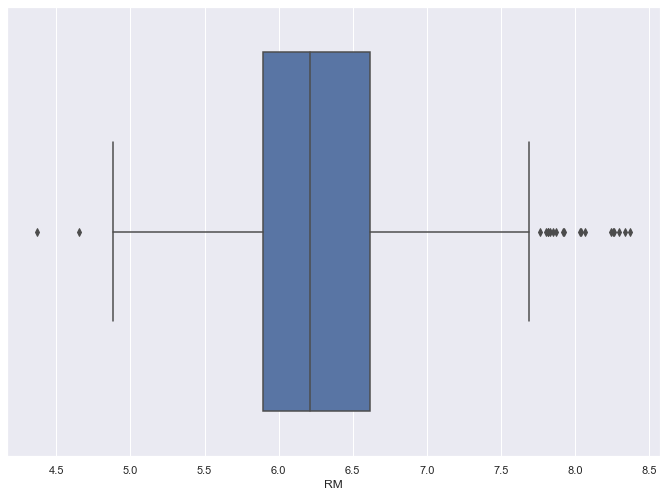

In [60]:
sns.boxplot(x=boston_housing_dataset_revised_wo['RM']) # Checking Outliers for RM (Number of Rooms)

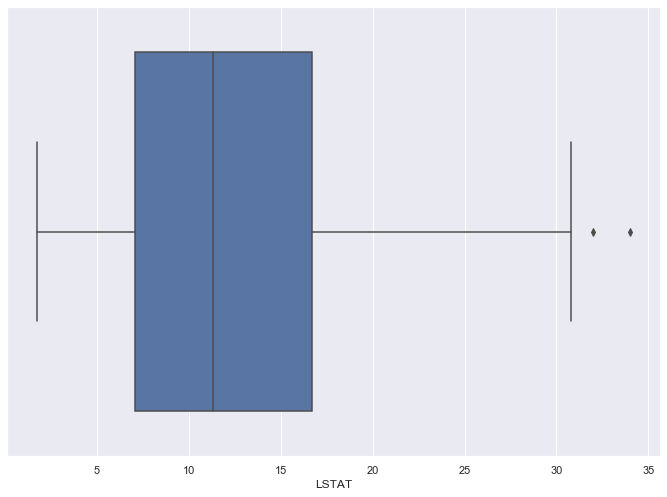

In [61]:
sns.boxplot(x=boston_housing_dataset_revised_wo['LSTAT']) # Checking Outliers for RM (Number of Rooms)

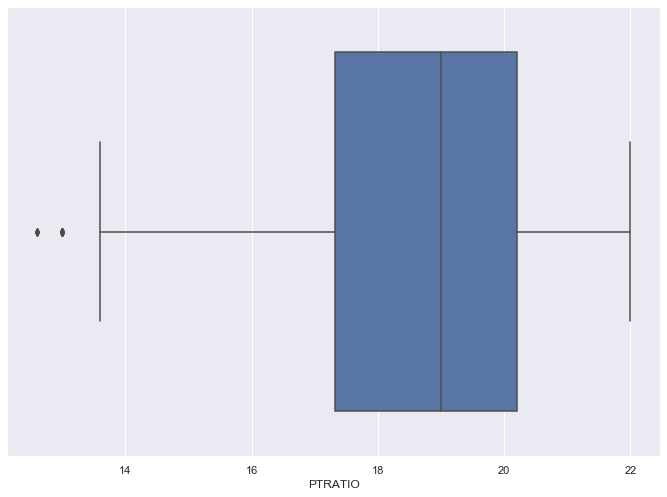

In [62]:
sns.boxplot(x=boston_housing_dataset_revised_wo['PTRATIO']) # Checking Outliers for RM (Number of Rooms)

### Standardization/Normalization

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(boston_housing_dataset_revised_wo.drop('MEDV', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
scaled_feature = scaler.transform(boston_housing_dataset_revised_wo.drop('MEDV', axis = 1))

In [66]:
df_feat = pd.DataFrame(scaled_feature, columns=boston_housing_dataset_revised_wo.columns[:-1])

In [67]:
df_feat.head()

,RM,LSTAT,PTRATIO
0,0.442862,-1.104574,-1.466173
1,0.197664,-0.490925,-0.301046
2,1.414101,-1.244711,-0.301046
3,1.116361,-1.405499,0.118400
4,1.353598,-1.052945,0.118400


**NOTE: We are not going to use standardized data for the selected attributes because it's giving weird results on performance metrics.**

## Evaluating Algorithms

### Linear Regression

In [200]:
from sklearn.linear_model import LinearRegression

In [262]:
#X = df_feat
X = boston_housing_dataset_revised_wo.drop('MEDV' , axis=1)

y = boston_housing_dataset_revised_wo['MEDV']

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [265]:
lr = LinearRegression(copy_X=True, fit_intercept=False, normalize=True, n_jobs=0)

In [266]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=0, normalize=True)

In [267]:
pred = lr.predict(X_test)

In [268]:
mean_absolute_error(y_test,pred)

3.809320234133541

In [269]:
mean_squared_error(y_test,pred)

34.844666975667074

In [270]:
np.sqrt(mean_squared_error(y_test,pred))

5.902937148205719

In [271]:
r2_score(y_test,pred)

0.6565275618030182

#### K-fold Cross Validation

In [272]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)

In [273]:
model = cross_val_score(lr,X,y, cv=5, scoring='r2')
print(model.mean())

0.5288415466318537


#### Prediction on new given data

In [240]:
new_unseen_data = pd.DataFrame([[5.0, 19.0, 20.1], [9.0, 8.0,10.1], [4.0, 37.0, 30.1]], columns=['RM', 'LSTAT','PTRATIO'])

In [241]:
new_unseen_data

,RM,LSTAT,PTRATIO
0,5.0,19.0,20.1
1,9.0,8.0,10.1
2,4.0,37.0,30.1


In [279]:
pred_new = lr.predict(new_unseen_data)

In [280]:
pred_new

array([  8.89591218,  47.28690074, -13.90819364])

**Observations:**
- **Seller 2** - 47,000 with higher number of rooms(9), lower poverty (8), lower PTRATIO (10:1)
- **Seller 1** - 9,000 with number of rooms(5),  poverty (19),  PTRATIO (20:1)
- **Seller 3** - Very low price due to less number of rooms (4), higher poverty (37), higher PTRATIO (30:1)


### Ordinary Least Sqaure (OLS) Optimization Algorithm (Final Model)

In [171]:
lm = sm.OLS.from_formula('MEDV ~  RM + LSTAT + PTRATIO',boston_housing_dataset_revised_wo)
result = lm.fit()

In [173]:
pred = result.predict(X_test)

In [175]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     395.1
Date:                Fri, 27 Nov 2020   Prob (F-statistic):          2.33e-130
Time:                        00:55:26   Log-Likelihood:                -1482.0
No. Observations:                 494   AIC:                             2972.
Df Residuals:                     490   BIC:                             2989.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9753      3.915      3.059      0.0

In [161]:
print ('rsquared = ' + str(result.rsquared))
print ('fvalue = ' + str(result.fvalue))
print ('intercept = ' + str(result.params.Intercept))
print ('RM = ' + str(result.params.RM))

rsquared = 0.7075172171390627
fvalue = 395.1040958229366
intercept = 11.975260188105308
RM = 5.347027574138583


#### Prediction on new given data

In [276]:
new = pd.DataFrame([[5.0, 19.0, 20.1], [9.0, 8.0,10.1], [4.0, 37.0, 30.1]], columns=['RM', 'LSTAT','PTRATIO'])

In [281]:
prediction_new = result.predict(new)

In [282]:
prediction_new

0    10.223159
1    46.709236
2   -14.407598
dtype: float64

**Observations:**
- **Seller 2** - 47,000 with higher number of rooms(9), lower poverty (8), lower PTRATIO (10:1)
- **Seller 1** - 10,000 with number of rooms(5),  poverty (19),  PTRATIO (20:1)
- **Seller 3** - Very low price due to less number of rooms (4), higher poverty (37), higher PTRATIO (30:1)


### Residuals against the fitted values

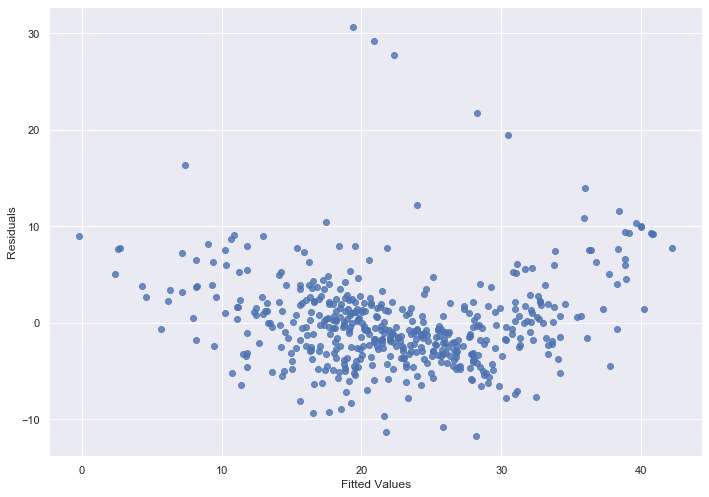

In [182]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

### Normalized Residuals against the fitted values

0     -1.458615
1     -0.835440
2      0.385732
3      0.347810
4      1.051184
         ...   
489   -0.236307
490   -0.159186
491   -0.842401
492   -0.929400
493   -1.990418
Name: S. Residuals, Length: 494, dtype: float64


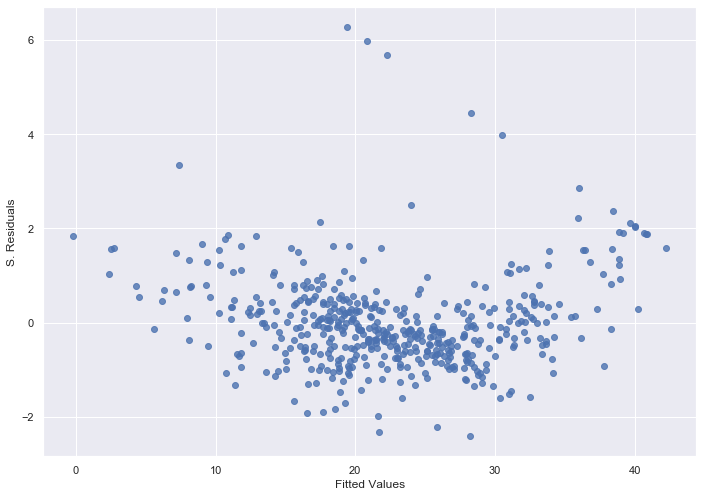

In [249]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals, fit_reg=False)
print(s_residuals)

### Points with high leverage in residual plot

0     -0.054387
1     -0.010598
2      0.012724
3      0.012530
4      0.035326
         ...   
501   -0.008207
502   -0.005852
503   -0.046546
504   -0.043922
505   -0.089924
Name: Leverage, Length: 494, dtype: float64


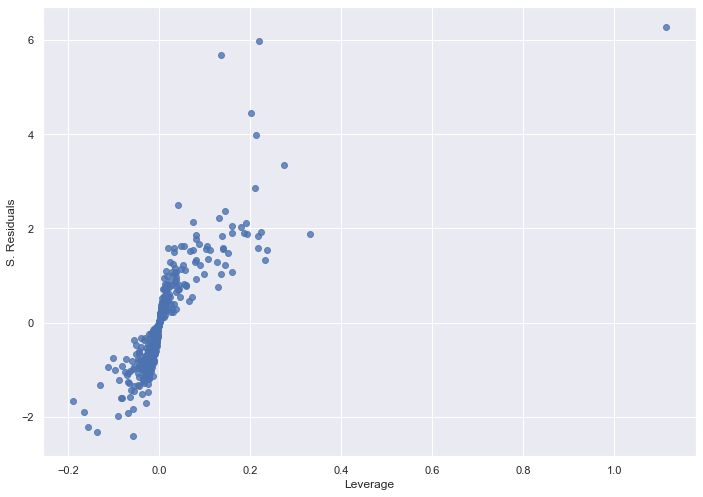

In [250]:
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals, fit_reg=False)
print(leverage)